In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from tqdm.notebook import tqdm
from typing import List

from uncertain_object import UncertainObject
from utils import generator

In [2]:
objects: List[UncertainObject] = []

dims = 3 #int(input("Enter the number of dimensions: "))
num_objects = 100#int(input("Enter the number of objects: "))
total_tests = int(num_objects * (num_objects - 1) / 2)
for _ in range(num_objects):
    mean = np.random.randint(0, 30, 1)
    std = np.random.randint(1, 3, 1)
    num_samples = np.random.randint(10, 60, 1)
    objects.append(UncertainObject(
        generator(num_samples, [], [(d, mean, std) for d in range(dims)], []))
    )
    
epsilons = np.linspace(0.5, 10.0, 10)

results = np.zeros((3, epsilons.size, total_tests), dtype=bool)

for idx, (i, j) in enumerate(tqdm(combinations(objects, 2), total=total_tests)):
    for k in range(epsilons.size):
        results[0, k, idx] = i.ej(j, epsilons[k])
        results[1, k, idx] = i.iej(j, epsilons[k])
        results[2, k, idx] = i.o_iej(j, epsilons[k])

  0%|          | 0/4950 [00:00<?, ?it/s]

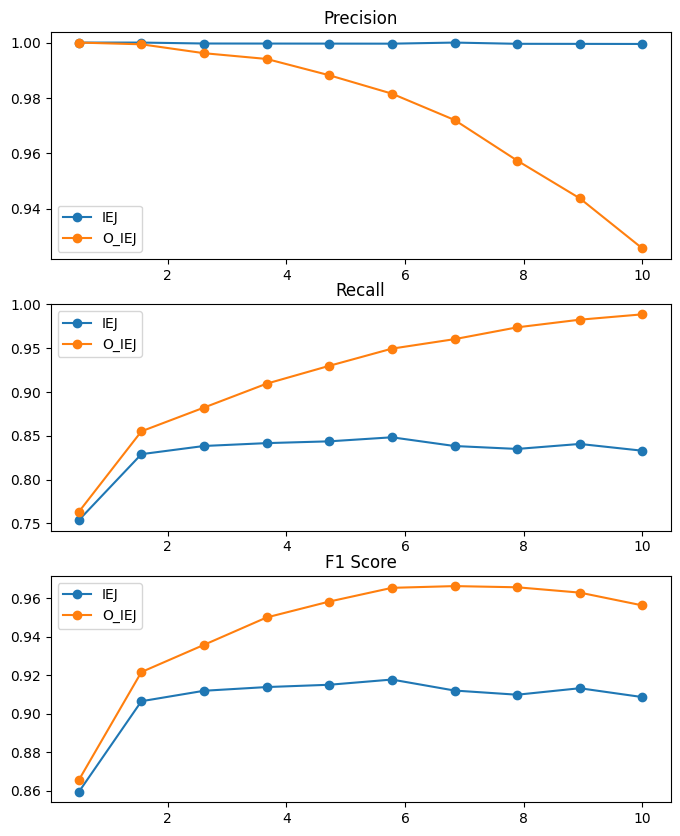

In [3]:
from sklearn.metrics import classification_report

precision = np.zeros((2, epsilons.size))
recall = np.zeros((2, epsilons.size))
f1_score = np.zeros((2, epsilons.size))

target = 'False'

for k in range(epsilons.size):
    iej = classification_report(results[0, k], results[1, k], output_dict=True, zero_division=0.0)
    oiej = classification_report(results[0, k], results[2, k], output_dict=True, zero_division=0.0)

    precision[0, k] = iej[target]['precision']
    recall[0, k] = iej[target]['recall']
    f1_score[0, k] = iej[target]['f1-score']

    precision[1, k] = oiej[target]['precision']
    recall[1, k] = oiej[target]['recall']
    f1_score[1, k] = oiej[target]['f1-score']

fig, axs = plt.subplots(3, 1, figsize=(8, 10))

axs[0].plot(epsilons, precision[0], label='IEJ', marker='o')
axs[0].plot(epsilons, precision[1], label='O_IEJ', marker='o')
axs[0].set_title('Precision')
axs[0].legend()

axs[1].plot(epsilons, recall[0], label='IEJ', marker='o')
axs[1].plot(epsilons, recall[1], label='O_IEJ', marker='o')
axs[1].set_title('Recall')
axs[1].legend()

axs[2].plot(epsilons, f1_score[0], label='IEJ', marker='o')
axs[2].plot(epsilons, f1_score[1], label='O_IEJ', marker='o')
axs[2].set_title('F1 Score')
axs[2].legend()